## Why re-scaling (Iris)?

Let's use the Iris dataset, a popular dataset in machine learning. The Iris dataset consists of 150 samples of iris flowers, with each sample containing four features: sepal length, sepal width, petal length, and petal width. We'll demonstrate the effect of not scaling the features on K-means clustering.

First, let's import the necessary libraries and load the Iris dataset:

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

Next, let's perform K-means clustering on the original dataset without scaling the features:

In [ ]:
# Apply K-means clustering without scaling
kmeans_unscaled = KMeans(n_clusters=2, random_state=42)
kmeans_unscaled.fit(X)

# Get the cluster centers and labels
centroids_unscaled = kmeans_unscaled.cluster_centers_
labels_unscaled = kmeans_unscaled.labels_

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_avg = silhouette_score(X, kmeans_unscaled.labels_)
print('Silhouette Average (Unscaled): ', silhouette_avg)

Silhouette Average (Unscaled):  0.6810461692117462


The interpretation of the silhouette score is relatively straightforward:

- **Close to +1**: A silhouette score near +1 indicates that the sample is far away from the neighboring clusters. This is a good indication of a well-clustered data point.
  
- **Close to 0**: A silhouette score near 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters. It could imply that the sample could belong to either one of the clusters.
  
- **Close to -1**: A silhouette score near -1 indicates that the samples might have been assigned to the wrong clusters. This could happen if the clusters overlap significantly or if the wrong number of clusters was chosen.

Now, let's visualize the clusters without scaling:

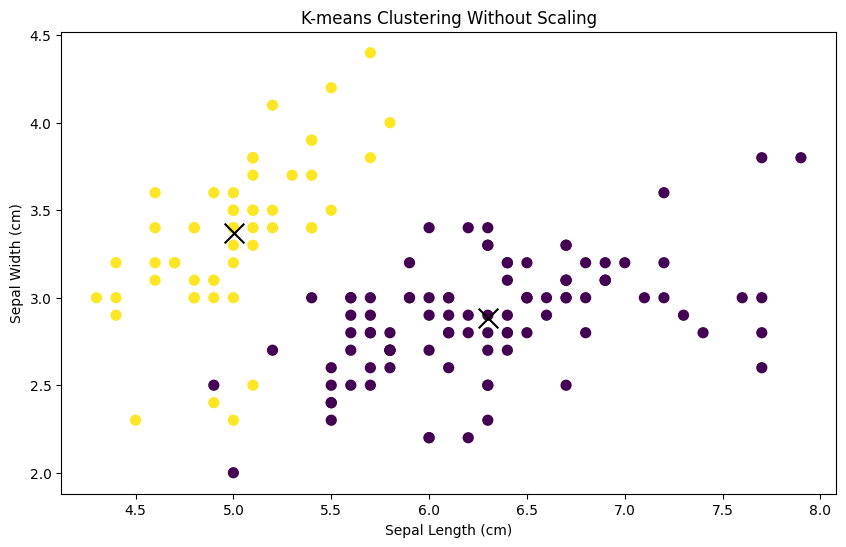

In [ ]:
# Visualize clusters without scaling
plt.figure(figsize=(10, 6))

plt.scatter(X[:, 0], X[:, 1], c=labels_unscaled, cmap='viridis', s=50)
plt.scatter(centroids_unscaled[:, 0], centroids_unscaled[:, 1], marker='x', s=200, c='black')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-means Clustering Without Scaling')

plt.show()

You'll notice that the clusters may not seem well-separated or meaningful. This is because the features of the Iris dataset have different scales, with sepal length ranging from approximately 4 to 8 cm, while sepal width ranges from approximately 2 to 4.5 cm.

Now, let's repeat the process after scaling the features using StandardScaler:

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering on scaled features
kmeans_scaled = KMeans(n_clusters=2, random_state=42)
kmeans_scaled.fit(X_scaled)

# Get the cluster centers and labels
centroids_scaled = kmeans_scaled.cluster_centers_
labels_scaled = kmeans_scaled.labels_

In [ ]:
silhouette_avg = silhouette_score(X, kmeans_scaled.labels_)
print('Silhouette Average (Scaled): ', silhouette_avg)

Silhouette Average (Scaled):  0.6867350732769777


Visualize the clusters after scaling:

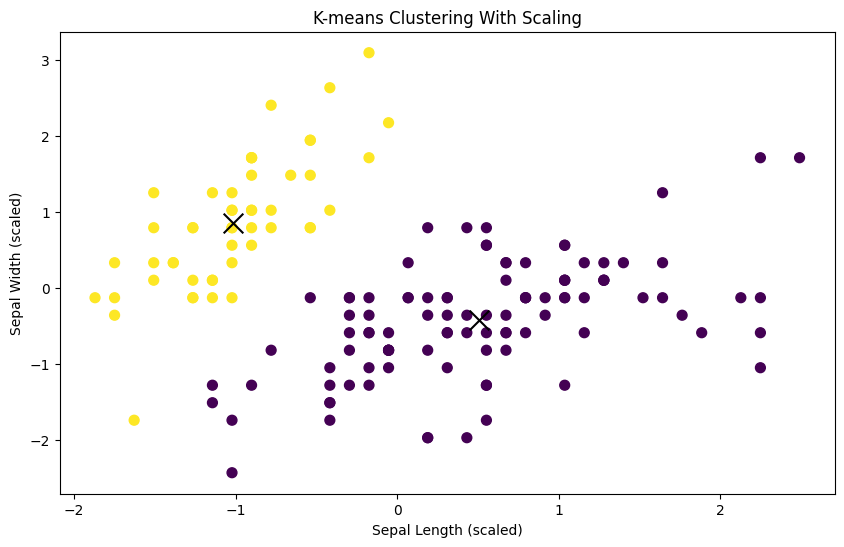

In [ ]:
# Visualize clusters with scaling
plt.figure(figsize=(10, 6))

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_scaled, cmap='viridis', s=50)
plt.scatter(centroids_scaled[:, 0], centroids_scaled[:, 1], marker='x', s=200, c='black')

plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('K-means Clustering With Scaling')

plt.show()

You should see clearer and more meaningful clusters after scaling the features, demonstrating the importance of feature scaling for K-means clustering, especially when dealing with datasets with features of different scales.